In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
path = 'final_3_load.xlsx'

In [34]:
df = pd.read_excel(path)

---
## 지수 

In [35]:
box_office_indicator_df = pd.DataFrame()

In [36]:
box_office_indicator_df['title'] = df['english_title']
box_office_indicator_df['genre'] = df['genre']

#전체 참여수
box_office_indicator_df["overall_Engagement_score"] = df['user_review']+ df['critic_review']

# 긍정,부정 무시하고 사용자 관심수 -> 장르를 가지고 시각화 해보기 
box_office_indicator_df['user_interest_num'] = df['user_review'] + df['watchlist']

# 전체 시즌 기준 비평가 영향력 지수
box_office_indicator_df['critic_influence_index'] = df['critic_review'] / df['imdb_season_num']

# 기대 지수 - 사용자 리뷰수와 비평가 리뷰수를 가지고 관심을 나타낸다 -> 기대지수라 할 수 있나?
box_office_indicator_df['Anticpation_index'] = df['user_review'] + df['critic_review']



In [37]:
box_office_indicator_df.tail(2)

,title,genre,overall_Engagement_score,user_interest_num,critic_influence_index,Anticpation_index
907,Dollar,"액션, 드라마, 로맨스",32,32,0.0,32
908,Elite Short Stories: Nadia Guzmán,"드라마, 로맨스",9,1406,3.0,9


---

In [38]:
# 각 장르의 앞뒤 공백을 제거하고 분리
genres = box_office_indicator_df['genre'].str.split(',').apply(lambda x: [g.strip() for g in x] if isinstance(x, list) else x).explode()


In [39]:
# 장르 분할 및 확장
box_office_indicator_df['genre'] = box_office_indicator_df['genre'].str.split(',').apply(lambda x: [g.strip() for g in x] if isinstance(x, list) else x)
expanded_df = box_office_indicator_df.explode('genre')

expanded_df

,title,genre,overall_Engagement_score,user_interest_num,critic_influence_index,Anticpation_index
0,Squid Game,액션,2709,252600,109.0,2709
0,Squid Game,드라마,2709,252600,109.0,2709
0,Squid Game,스릴러,2709,252600,109.0,2709
1,The Twelve,드라마,96,9889,3.5,96
1,The Twelve,스릴러,96,9889,3.5,96
...,...,...,...,...,...,...
907,Dollar,액션,32,32,0.0,32
907,Dollar,드라마,32,32,0.0,32
907,Dollar,로맨스,32,32,0.0,32
908,Elite Short Stories: Nadia Guzmán,드라마,9,1406,3.0,9


---
## 장르별 사용자 관심 수


In [40]:
# 장르별로 그룹화하여 사용자 관심 수의 기술 통계 계산
genre_user_interest_stats = expanded_df.groupby('genre')['user_interest_num'].describe()

# 기술 통계 출력
print(genre_user_interest_stats)


                count           mean            std     min       25%  \
genre                                                                   
Made in Europe   20.0  105382.900000  188746.274315  4136.0  15617.25   
SF              182.0   69804.483516  145981.944040     2.0   5144.00   
가족               39.0   17703.487179   31558.822145     1.0   1279.50   
공포               75.0   70354.440000  169136.407545     6.0   4350.50   
드라마             909.0   40817.000000  105929.058227     1.0   2505.00   
로맨스             218.0   25244.633028   74558.286738     1.0   2026.50   
범죄              268.0   51881.231343  131277.391852     2.0   3105.75   
서부                5.0   44272.400000   45508.046836     4.0   3038.00   
스릴러             355.0   50733.253521  129392.924457     1.0   3644.50   
스포츠              12.0   21440.833333   54280.289064     1.0   1053.75   
액션              153.0   66530.601307  131114.134622     7.0   5402.00   
역사               53.0   50447.943396  120303.211219

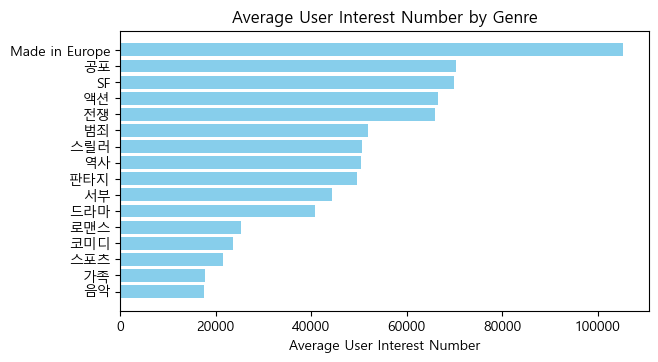

In [41]:
# 시각화
plt.figure(figsize=(15, 8))

# 1. 막대 그래프

genre_avg_interest = expanded_df.groupby('genre')['user_interest_num'].mean().sort_values()
plt.barh(genre_avg_interest.index, genre_avg_interest.values, color='skyblue')
plt.xlabel('Average User Interest Number')
plt.title('Average User Interest Number by Genre')

plt.show()

---
## 비평가 영향력 지수

In [49]:
#  비평가 리뷰 수를 시즌 수로 나누어 비평가 영향력 지수를 계산
expanded_df['critic_influence_index'].unique()

array([109.        ,   3.5       ,   0.        ,  43.        ,
        18.5       ,  28.        ,   6.        ,  32.45454545,
        12.11111111,  66.        ,   6.33333333,  60.66666667,
         8.5       ,  35.        ,  11.14285714,  57.5       ,
        10.        ,  13.        , 106.25      ,  15.25      ,
         7.5       ,  15.33333333,  34.        ,  32.        ,
        57.        ,  36.        ,   5.        ,   5.57142857,
        22.        ,  24.5       ,   8.        ,  11.75      ,
        23.83333333, 138.        ,  63.        ,  26.        ,
        33.16666667,  23.14285714,  13.83333333,  25.2       ,
        37.        ,  20.        ,  30.125     ,  33.        ,
        85.        ,   0.41176471,   4.85714286,   8.2       ,
        58.66666667,  51.        ,  68.        ,  16.75      ,
       100.        ,  27.        ,   7.8       ,  49.        ,
        26.66666667,  10.33333333,  36.4       ,  30.33333333,
        96.        ,   7.33333333,   2.        ,  24.  

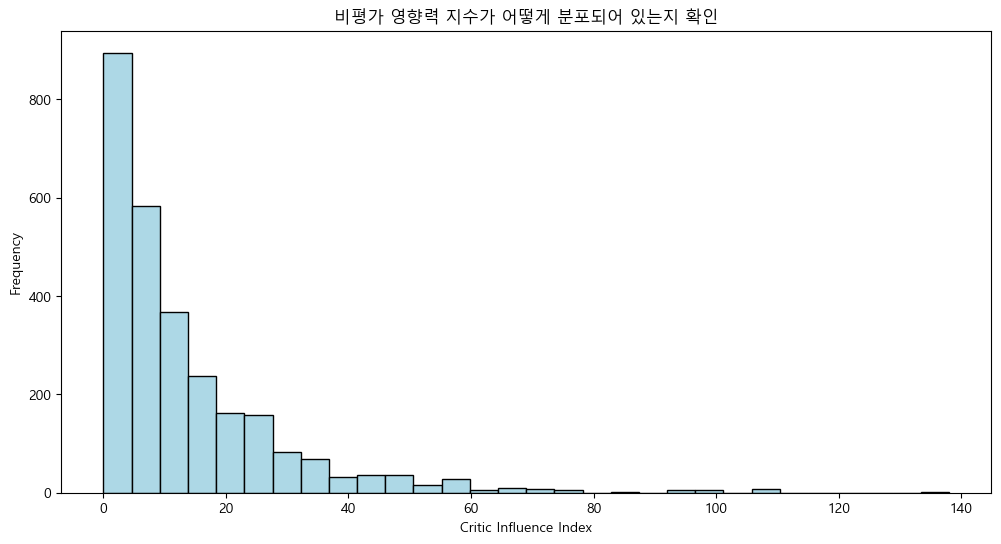

In [46]:
#비평가 영향력 지수가 어떻게 분포되어 있는지 확인
plt.figure(figsize=(12,6))
plt.hist(expanded_df['critic_influence_index'], bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Critic Influence Index')
plt.ylabel('Frequency') # 빈도
plt.title('비평가 영향력 지수가 어떻게 분포되어 있는지 확인')
plt.show()

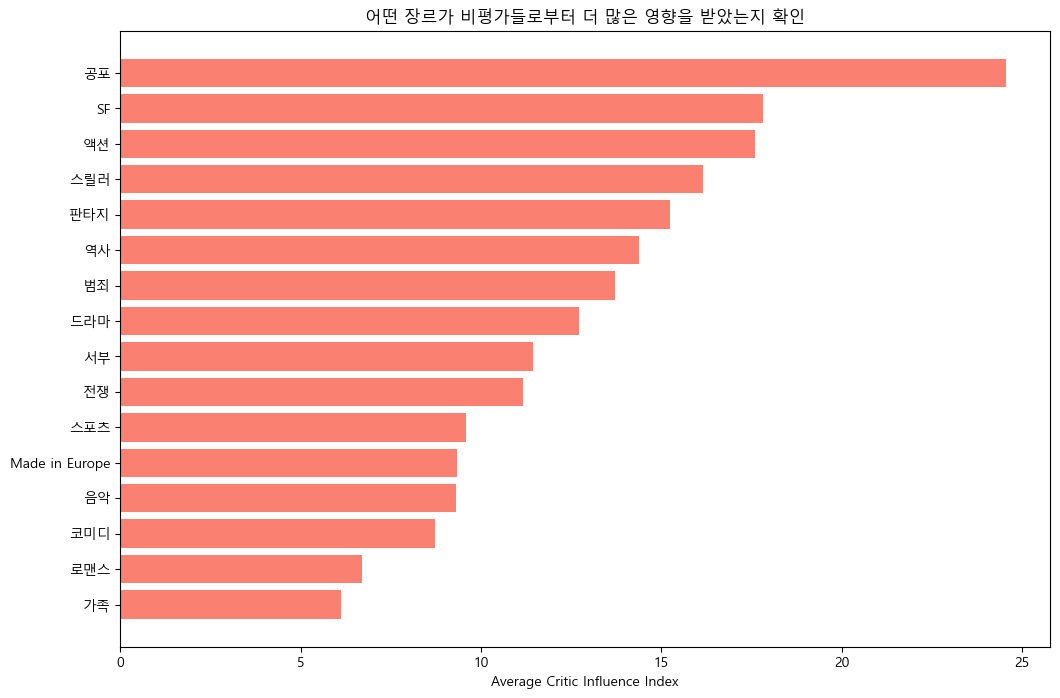

In [50]:
# 각 장르별로 비평가 영향력 지수의 평균을 계산
genre_avg_critic_influence = expanded_df.groupby('genre')['critic_influence_index'].mean().sort_values()

plt.figure(figsize=(12, 8))
plt.barh(genre_avg_critic_influence.index, genre_avg_critic_influence.values, color='salmon')
plt.xlabel('Average Critic Influence Index')
plt.title('어떤 장르가 비평가들로부터 더 많은 영향을 받았는지 확인')
plt.show()